![Lojistik Regresyon](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDsPQou-fyNtiBpaNAoSibRl-P0sRwjvCDlQ&s)

# Lojistik Regresyon

**Amaç**: Sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

- Bağımlı değişken kategorikdir.
- Adını bağımlı değişkene uygulanan logit dönüşümünden alır.
- Doğrusal Regresyonda aranan varsayımlar burada aranmaz; örneğin dağılımın normal olması gibi.
- Bağımlı değişkenin 1 olarak tanımlanabilirliği veririr. Gerçekleşme olasılığı bağımlı değişkenin alacağı değer ile ilgilenilmez.
- Lojistik fonksiyon sayesinde üretilen değerler 0-1 arasında olur.


### LOjistik Regresyon-Model

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time

from warnings import filterwarnings
filterwarnings('ignore') 

### Veri Seti detayi 
- bir hasta geldiğinde onun şeker hastası olup olmadığını tahmin edebilecek bir makina öğrenmesi modeli  geliştirilebilir mi 
| *TR*               | *EN*            | *explanation*                                                                 |
|-------------------------------|-------------------------------|-----------------------------------------------------------------------------|
| Gebelik Sayısı                | Pregnancies                   | Kadının kaç kez hamile kaldığını belirtir.                                   |
| Glikoz                        | Glucose                       | Kan şekerinin seviyesini gösterir (mg/dL cinsinden).                         |
| Kan Basıncı                   | Blood Pressure                | Diyastolik kan basıncı (mm Hg cinsinden).                                    |
| Deri Kalınlığı                | Skin Thickness                | Triceps deri kıvrımı kalınlığı (mm cinsinden).                               |
| İnsülin                       | Insulin                       | 2 saatlik serum insülin seviyesini gösterir (mu U/ml cinsinden).             |
| Vücut Kitle İndeksi (BMI)     | Body Mass Index (BMI)         | Vücut ağırlığının boyun karesine oranı (kg/m² cinsinden).                    |
| Diyabet Soygeçmiş Fonksiyonu  | Diabetes Pedigree Function    | Diyabet aile geçmişine dayalı fonksiyonel bir skor.                          |
| Yaş                           | Age                           | Kişinin yaşı (yıl cinsinden).                                                |
| Sonuç (Diyabet Durumu)        | Outcome                       | Diyabet hastalığı olup olmadığını gösterir (1 = diyabet, 0 = diyabet değil). |


In [526]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
df = df.dropna()
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

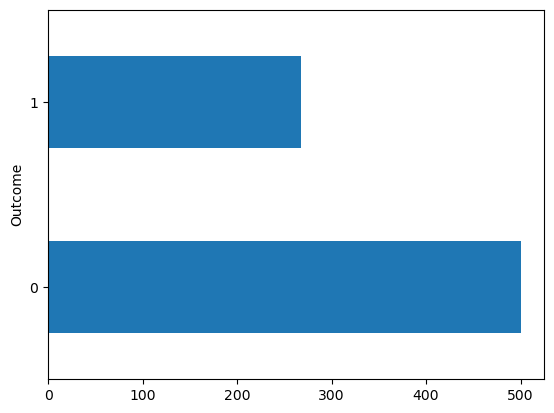

In [8]:
df["Outcome"].value_counts().plot.barh();

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1) 

In [11]:
# statsmodels
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.05922
Time:                        11:43:47   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [12]:
# scikit-learn
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver='liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(solver='liblinear')

In [13]:
# sabit
loj_model.intercept_

array([-5.89066097])

In [14]:
# tum bagimsiz degiskenlerin katsayi degerleri 
loj_model.coef_

array([[ 1.17042030e-01,  2.83845263e-02, -1.68918562e-02,
         7.55581552e-04, -6.42379703e-04,  5.97597102e-02,
         6.76888410e-01,  7.23931450e-03]])

### Tahmin & Model Tuning

In [16]:
y_pred = loj_model.predict(X)

In [17]:
# karmasiklik matrisi
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [18]:
# dogru siniflandirma  ornai 
accuracy_score(y, y_pred)

0.7747395833333334

In [19]:
# precision = kesinlik , recall = anma 
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [20]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [21]:
# 1. sinifin gerceklesme olasiligi  yani 1 veya 0 olma olsailigi (diyabet olama olasiligi)
# asigdaki ciktini 0. indexte yer alan 0 olasiligina aittir 
loj_model.predict_proba(X)[0:10]


array([[0.35045636, 0.64954364],
       [0.91700024, 0.08299976],
       [0.22480294, 0.77519706],
       [0.92135853, 0.07864147],
       [0.1674049 , 0.8325951 ],
       [0.79895254, 0.20104746],
       [0.88014921, 0.11985079],
       [0.27805284, 0.72194716],
       [0.32055182, 0.67944818],
       [0.92272181, 0.07727819]])

In [22]:
loj_model.predict_proba(X)[0:10][:,0:1]

array([[0.35045636],
       [0.91700024],
       [0.22480294],
       [0.92135853],
       [0.1674049 ],
       [0.79895254],
       [0.88014921],
       [0.27805284],
       [0.32055182],
       [0.92272181]])

In [23]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [24]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [25]:
y_probs[0:10]

array([0.64954364, 0.08299976, 0.77519706, 0.07864147, 0.8325951 ,
       0.20104746, 0.11985079, 0.72194716, 0.67944818, 0.07727819])

In [26]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]


In [27]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [28]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [29]:
## dogruluk scoru
accuracy_score(y, y_pred)

0.7747395833333334

In [30]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



- [ROC Eğrisi ve AUC Değeri](https://bilisim.io/2020/12/13/roc-egrisi-ve-auc-degeri/)


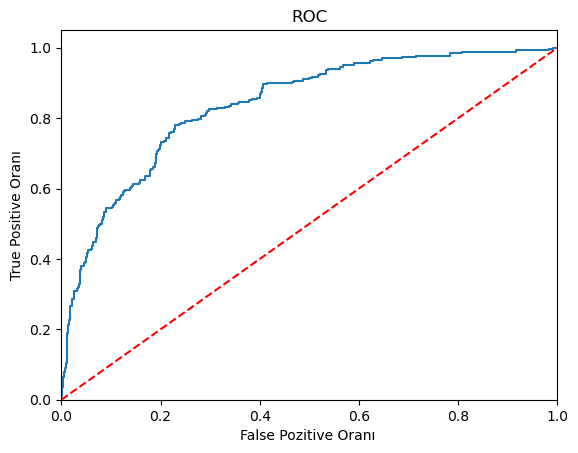

In [32]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Pozitive Oranı ")
plt.ylabel("True Positive Oranı")
plt.title('ROC')
plt.show;

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [34]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [35]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [36]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

### Naive Bayes
- [makale]()
- 1812 yılında Thomas Bayes tarafından bulunan koşullu olasılık hesaplama formülüdür.
- 
Tanım : Bayes teoremi, olasılık kuramı içinde incelenen önemli bir konudur. Bu teorem bir rassal değişken için olasılık dağılımı içinde koşullu olasılıklar ile marjinal olasılıklar arasındaki ilişkiyi gösterir.

### Gaussian Naive Bayes-predict-model tuning

In [39]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [42]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [43]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [44]:
# Test Hatamiz 
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [45]:
# dogrulanmis test scoru ( diassal bir hiperparametresi yok)
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

### K-En Yakın Komşu (KNN)

- Tahminler gözlem benzerliğine göre yapılır.
- Bana arkadaşını söyle sana kim olduğunu söyleyeyim.


#### Model & Tahmin

In [48]:
df = diabetes.copy()
df = df.dropna()
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

In [49]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [52]:
# daha detatli istatistikler 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



#### KNN_Model Tuning

In [54]:
knn_params = {"n_neighbors":np.arange(1,50)} 

In [55]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [56]:
print("EN iyi skor: "+ str(knn_cv.best_score_))
print("En iyi Parametreler"+ str(knn_cv.best_params_))

EN iyi skor: 0.748637316561845
En iyi Parametreler{'n_neighbors': 11}


In [57]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [58]:
# accuracy_score  degeri  score fonksiyonu ile de  elede edilebilir..
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [59]:
y_pred = knn_tuned.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7316017316017316

### Destek Vektör Makineleri (SVM)
- Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi (dogru)bulmaktır.
- sınıflar  doğrusal olarak birbirinden ayrılmayınca (kernel trick) çekirdek hilesi yöntemleri kullanılır. ornek iki boyutu 3 boyuta  çeviririz.
  


#### Model-Tahmin

In [63]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [64]:
svm_model = SVC(kernel = "linear").fit(X_train,y_train)

In [65]:
svm_model

SVC(kernel='linear')

In [66]:
y_pred = svm_model.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.7445887445887446

#### Model Tuning 

In [69]:
start_time = time.time()
svc_params = {"C" : np.arange(1,10)}
svc = SVC(kernel="linear")
svc_cv_model = GridSearchCV(svc, svc_params,
                            cv=10,
                            n_jobs = -1, 
                           verbose = 2)

svc_cv_model.fit(X_train, y_train)
end_time = time.time()

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [70]:
print("En iyi parametreler:" + str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 5}


In [71]:
svc_tuned = SVC(kernel = "linear", C=5).fit(X_train, y_train) 

In [72]:
y_pred = svc_tuned.predict(X_test)
# gercek degerler ile tahmin edilen degerleri karsilastiralim 
accuracy_score(y_test, y_pred)

0.7445887445887446

#### SVC RBF-Model & Tahmin
- rbf = radial basis function

In [74]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30,
                                                   random_state=42)

In [75]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [76]:
dir(svc_model)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_interce

In [77]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

#### SVC RBF-Model Tuning

In [79]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
              "gamma":[0.0001, 0.001, 0.1, 5, 10, 50, 100]}
svc = SVC(kernel = "rbf")
svc_cv_model =GridSearchCV(svc, svc_params,
                           cv=10,
                          n_jobs=-1,
                          verbose=2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 5, 10, 50, 100]},
             verbose=2)

In [80]:
print("EN iyi Parametreler:"+ str(svc_cv_model.best_params_))

EN iyi Parametreler:{'C': 10, 'gamma': 0.0001}


In [81]:
svc_tuned = SVC(kernel = "rbf", C=10, gamma=0.0001).fit(X_train, y_train)

In [82]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_pred,y_test)

0.7359307359307359

### Artificial neural networks (Yapay sinir Ağları)
- insan beyninin bilgi işleme şeklini referans alan sınıflandırma  ve regresyon problemleri şçin kullanılabilen kuvvetli makine  öğrenmesi algoritmalrından birisidir.

#### Model & Tahmin

In [85]:
df = diabetes.copy()
df =df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.30,
                                                   random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
X_train_scaled[0:5]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673],
       [-0.8362943 , -0.5524449 , -2.19528409,  1.13515422,  0.02749057,
         1.48664968, -0.83951493, -0.00638043]])

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [92]:
# katsayilar
mlpc.coefs_

[array([[-8.58988129e-02, -1.30430020e-01, -4.46869919e-01,
          2.85602403e-02,  2.10907344e-01, -1.25391007e-01,
         -1.23855603e-01, -2.88354919e-01,  4.34480461e-01,
          1.57048581e-01, -4.88466803e-02, -1.20563137e-01,
          1.88853379e-01, -3.28452157e-01, -3.15210310e-01,
          1.57761521e-01,  1.99762563e-01, -2.80224261e-01,
         -4.19745053e-02, -1.57640577e-01,  9.34586470e-02,
         -5.27457080e-01, -2.52078075e-01, -4.75325726e-02,
         -3.12988841e-01,  1.85548298e-01, -9.36123233e-02,
          4.58549195e-03, -7.42564436e-02,  5.16261062e-03,
          2.00111409e-01, -5.54242503e-02, -1.09219223e-02,
         -1.52549167e-01, -3.92688448e-01, -2.49249130e-02,
         -3.80187420e-01, -2.54204765e-01, -3.17597511e-02,
         -6.25392868e-02, -1.64250467e-02, -7.36614153e-02,
          5.21836638e-02, -1.89049888e-01,  1.52722094e-01,
          2.42014442e-01, -1.79146852e-01, -7.03755258e-02,
         -4.24501545e-02, -1.30236746e-0

In [93]:
# test hatasi 
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7445887445887446

#### Model Tuning

In [95]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\abdurezzak ekidi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'a

In [96]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                    (100,100,100),
                                    (100,100),
                                    (3,5),
                                    (5,3)],
              "solver": ["lbfgs","adam","sgd"],
              "activation":["relu","logistic"]}

In [97]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,
                            cv=10,
                            n_jobs=1,
                            verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [98]:
print("En iyi parametreler:"+str(mlpc_cv_model.best_params_))

En iyi parametreler:{'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [99]:
mlpc_tuned = MLPClassifier(activation="relu",
                           alpha=0.005,
                           hidden_layer_sizes=(100,100,100),
                          solver="sgd")

In [100]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver='sgd')

In [101]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7705627705627706

#### Calssification and Regression Trees(CART)

![](https://res.cloudinary.com/sadanandsingh/image/upload/q_auto/v1567365989/tree/img1.png)

#### Model & Tahmin

In [105]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train) 

In [108]:
cart_model

DecisionTreeClassifier()

In [109]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[5] <= 28.149999618530273 else 0) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[0] <= 5.0 else 0) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[0] <= 9.0 else 0) if x[5] <= 
    26.949999809265137 else (1 if x[1

In [110]:
''' burda diyelim ben hastanede calisyorum  hasta geldi diabet olup olmadigini 
ogrenmek istiyor  x yrine  kac hamilelik gecirdigini  girdigimde bana 
ya 0 diabet degil yada 1 yani diabet.
'''
x = [7]

In [111]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [112]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

#### CART-Model Tuning

In [114]:
#?cart_model

In [115]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split": list(range(2,50))}

In [116]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid,
                       cv = 10,
                       n_jobs = -1,
                       verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [117]:
print("EN iyi parametreler: "  + str(cart_cv_model.best_params_))

EN iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [118]:
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)
cart_tuned = cart.fit(X_train, y_train)

In [119]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

### Random Forests Classification
- temeli birden cok karar agacinin urettigi tahminlerin bir araya getirilerek degerlendirilmesine dayanir.
  
                                                                   Breiman 2001

#### RF Model & Tahmin

In [122]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [125]:
rf_model

RandomForestClassifier()

In [126]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

#### RF Model Tuning

In [128]:
#?rf_model

In [129]:
rf_params =  {"max_depth": [2,5,8,10],
              "max_features": [2,5,8],
              "n_estimators":[10,100,500,1000],
             "min_samples_split": [2,5,10]}

In [130]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

In [131]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 500, 1000]},
             verbose=2)

In [488]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [490]:
rf_tuned_model = RandomForestClassifier(max_depth=10,
                                        max_features=8,
                                        min_samples_split=5,
                                       n_estimators=1000)
rf_tuned_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [494]:
y_pred = rf_tuned_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

In [134]:
Importance = pd.DataFrame({"Importance": rf_tuned_model.feature_importances_*100},
                         index =  X_train.columns)

Text(0, 0.5, 'degiskenler')

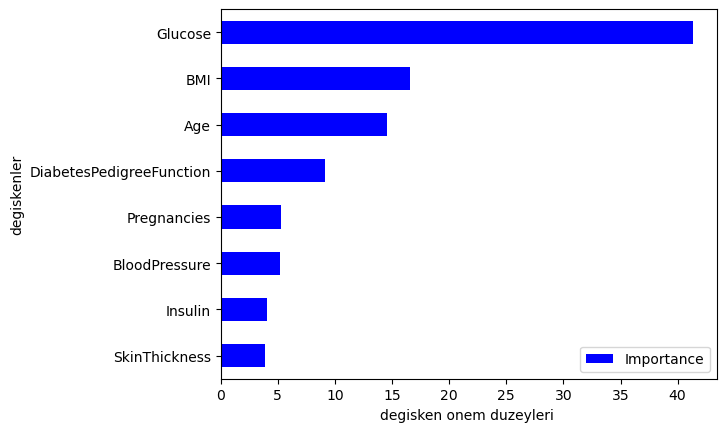

In [135]:
Importance.sort_values(by= "Importance",
                      axis=0,
                      ascending=True).plot(kind = 'barh',color= 'blue')
plt.xlabel('degisken onem duzeyleri ')
plt.ylabel('degiskenler')

### GBM-Model&Tahmin

In [137]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42) 

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [140]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#### Model Tuning 

In [142]:
gbm_model

GradientBoostingClassifier()

In [143]:
gbm_params = {
    'learning_rate': [0.01, 0.1, 0.2,0.001, 0.05],
    'max_depth': [3, 4, 5, 8 ,10],
    'n_estimators': [100, 200, 300, 500, 1000],
    'min_samples_split':[2, 5, 10]
}

In [144]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params,
                      cv=10,
                      n_jobs= -1,
                      verbose=2)

In [145]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.001, 0.05],
                         'max_depth': [3, 4, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             verbose=2)

In [146]:
print("EN iyi parametreler: " + str (gbm_cv.best_params_))

EN iyi parametreler: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [147]:
gbm_tuned_model = GradientBoostingClassifier(learning_rate=0.05,
                                       max_depth=4,
                                      min_samples_split=2,
                                      n_estimators=100).fit(X_train, y_train)

In [148]:
y_pred = gbm_tuned_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [149]:
Importance = pd.DataFrame({"Importance": gbm_tuned_model.feature_importances_*100},
                         index=X_train.columns)

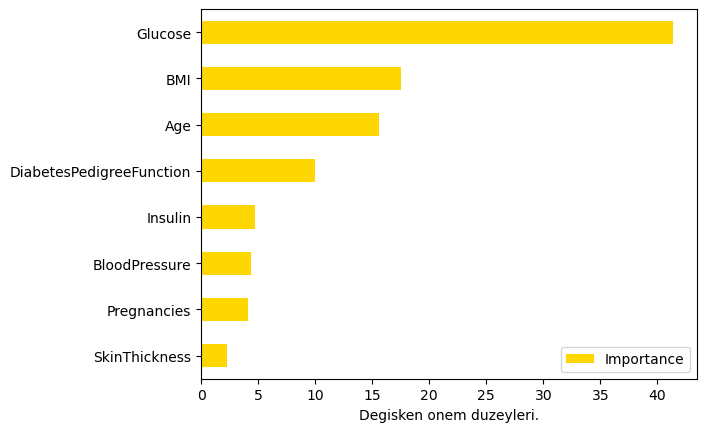

In [150]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind= 'barh', color='gold')
plt.xlabel('Degisken onem duzeyleri.');

#### XGBoost Model & Tahmin

In [152]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train,y_test =  train_test_split(X,y, 
                                                   test_size=0.30,
                                                   random_state=42)

In [153]:
from xgboost import XGBClassifier

In [154]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [155]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [156]:
y_pred  = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

#### Model Tuning

In [158]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\abdurezzak ekidi\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - 

In [159]:
xgb_params = {"n_estimators": [100, 200, 500,1000,2000],
              "max_depth": [3, 4, 5, 6, 8, 10],
              "learning_rate":[0.1, 0.01, 0.02, 0.05],
              "subsample":[0.6, 0.8, 1.0],
              "min_samples_split":[2,5, 10]
             } 

In [160]:
xgb  = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params,
                     cv=10,
                     n_jobs=-1,
                     verbose=2)

In [161]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [162]:
print('En iyi parametreler: ' + str (xgb_cv_model.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}


In [163]:
xgb_tuned_model = XGBClassifier(learning_rate= 0.01,
                                max_depth= 3, 
                                min_samples_split = 2,
                               n_estimators = 200,
                               subsample = 0.8).fit(X_train, y_train)

In [164]:
y_pred = xgb_tuned_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

In [165]:
# bir baska kullanim
xgb_tuned_model.score(X_test, y_test)

0.7619047619047619

In [166]:
Importance = pd.DataFrame({"Importance": xgb_tuned_model.feature_importances_*100},
                         index=X_train.columns)

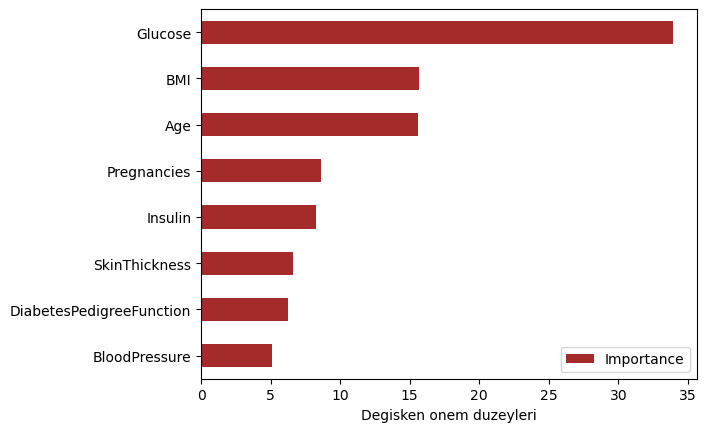

In [167]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind= 'barh', color= 'brown')
plt.xlabel('Degisken onem duzeyleri');

#### Light GBM

In [169]:
df = diabetes.copy()
df = df.dropna()
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   test_size=0.30,
                                                   random_state=42)

In [170]:
from lightgbm import LGBMClassifier

In [171]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [172]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [173]:
# 2. kullanim 
lgbm_model.score(X_test, y_test)

0.7229437229437229

#### Light GBM Model Tuning

In [175]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\abdurezzak ekidi\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
    If setting this to a positive value, consider also changing ``num_leaves`` to ``<= 2^max_depth``.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``lear

In [176]:
lgbm_params = {"n_estimators": [100, 500, 1000,2000],
              "subsample": [0.6, 0.8, 1.0],
              "max_depth":[3, 4, 5, 6],
              "learning_rate":[0.1, 0.01, 0.02, 0.05],
              "min_child_samples":[5,10,20]}

In [177]:
lgbm  = LGBMClassifier()
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)

In [178]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [179]:
print('EN iyi parametreler: '+ str (lgbm_cv_model.best_params_))

EN iyi parametreler: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 100, 'subsample': 0.6}


In [180]:
lgbm_tuned_model = LGBMClassifier(n_estimators =100 ,
                                  subsample =0.6 ,
                                  max_depth =3,
                                  learning_rate =0.05,
                                  min_child_samples =20 )


In [181]:
lgbm_tuned_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(learning_rate=0.05, max_depth=3, subsample=0.6)

In [182]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5263613559678152

In [183]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score


In [184]:
# Doğruluk Skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru (Accuracy): {accuracy:.2f}")

Doğruluk Skoru (Accuracy): 0.72


In [185]:
# Kesinlik (Precision)
precision = precision_score(y_test, y_pred, average='binary')  
print(f"Kesinlik (Precision): {precision:.2f}")

Kesinlik (Precision): 0.59


In [186]:
# Anma (Recall)
recall = recall_score(y_test, y_pred, average='binary')  
print(f"Anma (Recall): {recall:.2f}")

Anma (Recall): 0.65


In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



In [188]:
Importance = pd.DataFrame({"Importance":lgbm_tuned_model.feature_importances_},
                         index= X_train.columns)

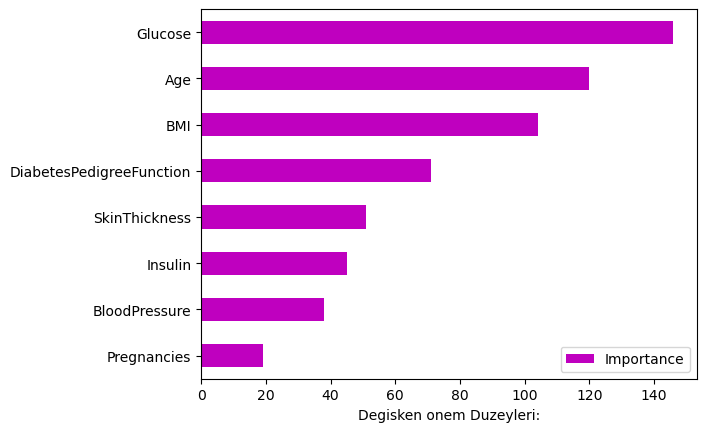

In [189]:
Importance.sort_values(by= 'Importance',
                      axis= 0,
                      ascending= True).plot(kind='barh', color='m')
plt.xlabel("Degisken onem Duzeyleri:");

#### Catboost Model & Tahmin

In [191]:
from catboost import CatBoostClassifier

In [192]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30,
                                                   random_state=42)

In [193]:
catb_model = CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 147ms	remaining: 2m 27s
1:	learn: 0.6843414	total: 149ms	remaining: 1m 14s
2:	learn: 0.6805760	total: 151ms	remaining: 50s
3:	learn: 0.6765782	total: 152ms	remaining: 38s
4:	learn: 0.6720829	total: 154ms	remaining: 30.6s
5:	learn: 0.6681617	total: 155ms	remaining: 25.7s
6:	learn: 0.6641912	total: 157ms	remaining: 22.2s
7:	learn: 0.6602881	total: 159ms	remaining: 19.7s
8:	learn: 0.6562626	total: 160ms	remaining: 17.7s
9:	learn: 0.6528483	total: 162ms	remaining: 16s
10:	learn: 0.6487823	total: 164ms	remaining: 14.7s
11:	learn: 0.6454980	total: 165ms	remaining: 13.6s
12:	learn: 0.6418953	total: 167ms	remaining: 12.7s
13:	learn: 0.6374431	total: 169ms	remaining: 11.9s
14:	learn: 0.6339676	total: 170ms	remaining: 11.2s
15:	learn: 0.6304252	total: 172ms	remaining: 10.6s
16:	learn: 0.6266998	total: 174ms	remaining: 10s
17:	learn: 0.6237660	total: 175ms	remaining: 9.56s
18:	learn: 0.6204394	total: 177ms	remaining: 9.13s
19:	learn: 0.617012

In [194]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [195]:
catb_model.score(X_test,y_test)

0.7402597402597403

In [196]:
precision_score(y_pred,y_test)

0.6375

In [197]:
recall_score(y_pred,y_test)

0.6219512195121951

### Model Tuning

In [199]:
?catb_model

Type:           CatBoostClassifier
String form:    <catboost.core.CatBoostClassifier object at 0x000002E5D5307EF0>
File:           c:\users\abdurezzak ekidi\anaconda3\lib\site-packages\catboost\core.py
Docstring:     
Implementation of the scikit-learn API for CatBoost classification.

Parameters
----------
iterations : int, [default=500]
    Max count of trees.
    range: [1,+inf)
learning_rate : float, [default value is selected automatically for binary classification with other parameters set to default. In all other cases default is 0.03]
    Step size shrinkage used in update to prevents overfitting.
    range: (0,1]
depth : int, [default=6]
    Depth of a tree. All trees are the same depth.
    range: [1,16]
l2_leaf_reg : float, [default=3.0]
    Coefficient at the L2 regularization term of the cost function.
    range: [0,+inf)
model_size_reg : float, [default=None]
    Model size regularization coefficient.
    range: [0,+inf)
rsm : float, [default=None]
    Subsample ratio of 

In [200]:
"""
catb_params ={'iterations': [200, 500],
             'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 8]}
             """  
catb_params = {
    'iterations': [200, 500],                # İdeal iterasyon sayısı için küçük bir aralık
    'learning_rate': [0.01, 0.05, 0.1],            # Öğrenme hızı (genelde modelin hassasiyetini etkiler)
    'depth': [3, 6,8],                         # Ağaç derinliği (daha büyük derinlik daha karmaşık modeller)
    'l2_leaf_reg': [3, 10],                  # Regularization (aşırı öğrenmeyi önlemek için önemli)
    'bagging_temperature': [1],             # Ortalama bir çeşitlilik değeri
}


In [201]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=2)
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6876218	total: 1.98ms	remaining: 989ms
1:	learn: 0.6835365	total: 4.07ms	remaining: 1.01s
2:	learn: 0.6797016	total: 5.88ms	remaining: 974ms
3:	learn: 0.6759063	total: 7.58ms	remaining: 940ms
4:	learn: 0.6708520	total: 9.14ms	remaining: 905ms
5:	learn: 0.6667354	total: 10.9ms	remaining: 900ms
6:	learn: 0.6621856	total: 12.7ms	remaining: 895ms
7:	learn: 0.6579444	total: 14.2ms	remaining: 874ms
8:	learn: 0.6538278	total: 15.8ms	remaining: 862ms
9:	learn: 0.6494209	total: 17.4ms	remaining: 854ms
10:	learn: 0.6452493	total: 19.1ms	remaining: 851ms
11:	learn: 0.6416543	total: 20.9ms	remaining: 851ms
12:	learn: 0.6378732	total: 22.7ms	remaining: 850ms
13:	learn: 0.6333645	total: 24.7ms	remaining: 858ms
14:	learn: 0.6297362	total: 26.6ms	remaining: 859ms
15:	learn: 0.6256801	total: 28.1ms	remaining: 850ms
16:	learn: 0.6219039	total: 29.8ms	remaining: 846ms
17:	learn: 0.6184560	total: 31.5ms	remaining: 842ms
18:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002E5EE53D130>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [1], 'depth': [3, 6, 8],
                         'iterations': [200, 500], 'l2_leaf_reg': [3, 10],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [397]:
catb_cv_model.best_params_

{'bagging_temperature': 1,
 'depth': 6,
 'iterations': 500,
 'l2_leaf_reg': 10,
 'learning_rate': 0.01}

In [401]:
catb_tuned_model = CatBoostClassifier(iterations=500,
                                      bagging_temperature=1,
                                      l2_leaf_reg=10,
                                      depth=6,
                                      learning_rate=0.01).fit(X_train,y_train)

0:	learn: 0.6876218	total: 1.86ms	remaining: 930ms
1:	learn: 0.6835365	total: 3.78ms	remaining: 941ms
2:	learn: 0.6797016	total: 5.11ms	remaining: 846ms
3:	learn: 0.6759063	total: 6.87ms	remaining: 852ms
4:	learn: 0.6708520	total: 8.68ms	remaining: 860ms
5:	learn: 0.6667354	total: 10.3ms	remaining: 848ms
6:	learn: 0.6621856	total: 11.6ms	remaining: 818ms
7:	learn: 0.6579444	total: 13ms	remaining: 801ms
8:	learn: 0.6538278	total: 14.4ms	remaining: 787ms
9:	learn: 0.6494209	total: 15.8ms	remaining: 772ms
10:	learn: 0.6452493	total: 17.2ms	remaining: 766ms
11:	learn: 0.6416543	total: 18.8ms	remaining: 765ms
12:	learn: 0.6378732	total: 20.8ms	remaining: 779ms
13:	learn: 0.6333645	total: 22.5ms	remaining: 781ms
14:	learn: 0.6297362	total: 24.2ms	remaining: 782ms
15:	learn: 0.6256801	total: 25.6ms	remaining: 775ms
16:	learn: 0.6219039	total: 27.6ms	remaining: 783ms
17:	learn: 0.6184560	total: 28.9ms	remaining: 773ms
18:	learn: 0.6147793	total: 30.4ms	remaining: 770ms
19:	learn: 0.6111378	tot

In [403]:
catb_tuned_model.score(X_test,y_test)

0.7619047619047619

In [205]:
y_pred = catb_tuned_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [206]:
recall_score(y_pred, y_test)

0.6575342465753424

In [207]:
precision_score(y_pred, y_test)

0.6

### Tum Modellerin Karsilastirilmasi

In [542]:
models = [
    loj_model,
    nb_model,
    knn_tuned,
    svc_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned_model,
    gbm_tuned_model,
    xgb_tuned_model,
    lgbm_tuned_model,
    catb_tuned_model
]

for model in models:
    model_name = model.__class__.__name__
    
    if model == mlpc_tuned:
        y_pred = model.predict(X_test_scaled)  
        
    else:
        y_pred = model.predict(X_test)         

    accuracy = accuracy_score(y_test, y_pred)
    
    print("--" * 15)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.4%}")



------------------------------
LogisticRegression:
Accuracy: 75.3247%
------------------------------
GaussianNB:
Accuracy: 74.4589%
------------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
------------------------------
SVC:
Accuracy: 73.5931%
------------------------------
MLPClassifier:
Accuracy: 77.0563%
------------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
------------------------------
RandomForestClassifier:
Accuracy: 74.8918%
------------------------------
GradientBoostingClassifier:
Accuracy: 74.0260%
------------------------------
XGBClassifier:
Accuracy: 76.1905%
------------------------------
LGBMClassifier:
Accuracy: 74.8918%
------------------------------
CatBoostClassifier:
Accuracy: 76.1905%


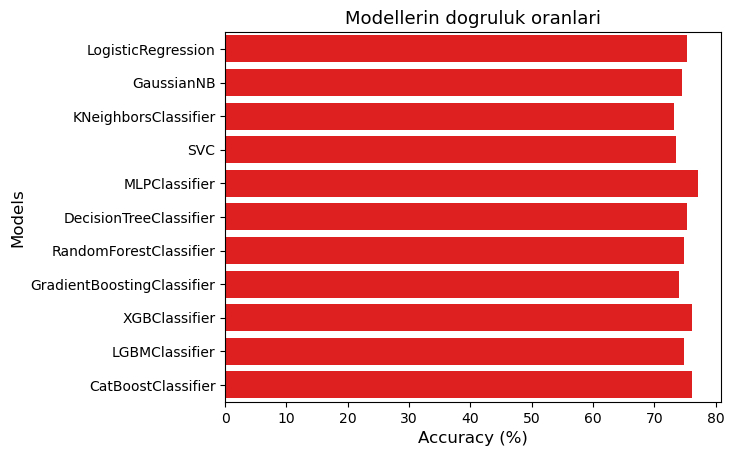

In [502]:
results = []
results = pd.DataFrame(columns= ['Models', 'Accuracy'])

for model in models:
    model_name = model.__class__.__name__
    
    if model == mlpc_tuned:
        y_pred = model.predict(X_test_scaled)  
        
    else:
        y_pred = model.predict(X_test)         

    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[model_name, accuracy*100]], columns=['Models', 'Accuracy'])
    #results = results.append(result)
    results = pd.concat([results, result], ignore_index=True)

sns.barplot(x='Accuracy', y='Models', data=results, color='red')
plt.title("Modellerin dogruluk oranlari", fontsize=13);
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Models", fontsize=12);


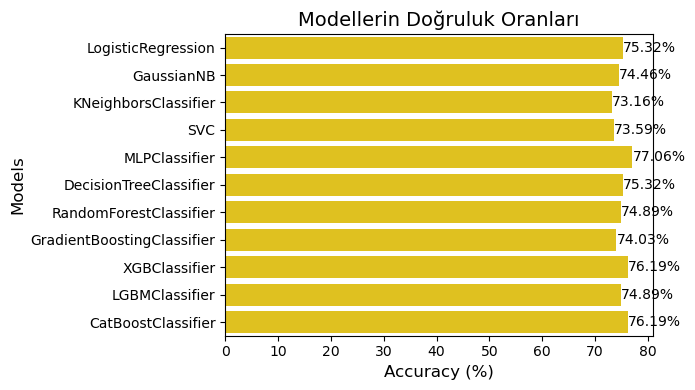

In [498]:
results = pd.DataFrame(columns=['Models', 'Accuracy'])

# Modellerin doğruluğunu hesapla
for model in models:
    model_name = model.__class__.__name__
    
    if model == mlpc_tuned:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[model_name, accuracy * 100]], columns=['Models', 'Accuracy'])
    results = pd.concat([results, result], ignore_index=True)

# Barplot çizimi
plt.figure(figsize=(7, 4))
barplot = sns.barplot(x='Accuracy', y='Models', data=results, color='gold')
plt.title("Modellerin Doğruluk Oranları", fontsize=14)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Models", fontsize=12)

# Değerleri çubukların üzerine yaz
for i, bar in enumerate(barplot.patches):
    accuracy = results.iloc[i]['Accuracy']
    barplot.annotate(f"{accuracy:.2f}%",  # Yüzde olarak göster
                     (bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Konum
                     ha='left', va='center', fontsize=10, color='black')

# Grafiği göster
plt.tight_layout()
plt.show()

In [540]:
modeller = [
    loj_model,
    nb_model,
    knn_tuned,
    svc_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned_model,
    gbm_tuned_model,
    xgb_tuned_model,
    lgbm_tuned_model,
    catb_tuned_model
]


#Örnek gözlem:[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_observation = np.array([[8, 183, 64, 0, 0, 23.3, 0.672, 32]])

scaler = StandardScaler()
tahminler = []

# Veriyi ölçeklendirme
new_observation_scaled = scaler.fit_transform(new_observation)

for model in modeller:
    if model == mlpc_tuned:

        tahmin = model.predict(new_observation_scaled)[0]
    else:
       
        tahmin = model.predict(new_observation)[0]
    
    tahminler.append(tahmin)

ortalama_tahmin = np.mean(tahminler)

# Sonuçları yazdır
print("Her modelin tahminleri:")
for i, model in enumerate(modeller):
    print(f"{model.__class__.__name__}: {tahminler[i]}")

print(f"\nOrtalama Tahmin (Ensemble Learning): {ortalama_tahmin:.2f}") 



Her modelin tahminleri:
LogisticRegression: 1
GaussianNB: 1
KNeighborsClassifier: 1
SVC: 1
MLPClassifier: 0
DecisionTreeClassifier: 1
RandomForestClassifier: 1
GradientBoostingClassifier: 1
XGBClassifier: 1
LGBMClassifier: 1
CatBoostClassifier: 1

Ortalama Tahmin (Ensemble Learning): 0.91
